# Mecánica Celeste: teoría, algoritmos y problemas
# Por Jorge I. Zuluaga

En estos cuadernos hemos compilado la mayoría de los códigos que vienen con el libro [**Mecánica Celeste: teoría, algoritmos y problemas**](https://www.buscalibre.com.co/libro-mecanica-celeste-teoria-algoritmos-y-problemas/9789585011953/p/62242977?afiliado=74c874bfb5a8145d7c1b). En cada cuaderno encontrará códigos de secciones o capítulos enteros. Para explicaciones detalladas de lo que hacen los códigos refiérase a la sección o capítulo respectivo. Para mayor comodidad puede leer o ejecutar este cuaderno usando `Google Colab`.

<a target="_blank" href="https://colab.research.google.com/github/seap-udea/pymcel/blob/main/ejemplos/cuadernos-libro/mcel_zuluaga-17-trescuerpos_potencial_modificado.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

## Algorítmos del problema de los tres cuerpos: el potencial modificado

### Instalación e importación

Si está usando este cuaderno en `Colab` debería instalar `pymcel` antes de comenzar: 

In [1]:
!pip install -Uq pymcel

In [2]:
# Este código se usa solamente para desarrollar estos cuadernos pero es inocuo en otros contextos
%load_ext autoreload 
%autoreload 2

### El potencial modificado

En el algoritmo a continuación se calcula el valor del potencial modificado en una malla coordenada como la que hemos usado a lo largo de este capítulo y se visualiza en el espacio de tres dimensiones:

In [4]:
#Parámetros del sistema
alfa=0.3

#Malla coordenada
from numpy import meshgrid,zeros_like,linspace
rango=1.5
NG=100
X,Y=meshgrid(linspace(-rango,rango,NG),
             linspace(-rango,rango,NG))
Z=zeros_like(X)
#Factor de suavizado (ver nota)
eps=0.8*alfa

#Distancia relativa
from numpy import sqrt
r1=sqrt((X+alfa)**2+Y**2+Z**2+eps**2)
r2=sqrt((X-1+alfa)**2+Y**2+Z**2+eps**2)

#Calcula el potencial
Vmod=-(1-alfa)/r1-alfa/r2-0.5*(X**2+Y**2)

from numpy import set_printoptions
set_printoptions(precision=2,suppress=True,threshold=3)
print(f"Vmod = \n{Vmod}")

Vmod = 
[[-2.72 -2.68 -2.64 ... -2.64 -2.68 -2.72]
 [-2.68 -2.64 -2.6  ... -2.6  -2.64 -2.68]
 [-2.65 -2.6  -2.57 ... -2.56 -2.6  -2.64]
 ...
 [-2.65 -2.6  -2.57 ... -2.56 -2.6  -2.64]
 [-2.68 -2.64 -2.6  ... -2.6  -2.64 -2.68]
 [-2.72 -2.68 -2.64 ... -2.64 -2.68 -2.72]]


Una gráfica del potencial modificado sobre el plano $x-y$ en el CRTBP se puede crear con el algoritmo a continuación:

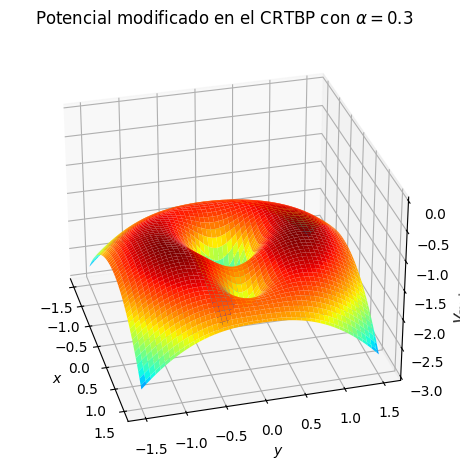

In [5]:
#Grafico
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig=plt.figure()
ax=fig.add_subplot(111, projection='3d')
ax.plot_surface(X,Y,Vmod,cmap="jet",rstride=2,cstride=2)
ax.set_zlim((-3,0))
ax.view_init(30,-15)

ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.set_zlabel("$V_\mathrm{mod}$")
ax.set_title(f"Potencial modificado en el CRTBP con $\\alpha={alfa}$")
fig.tight_layout()

Otra manera de visualizar el mismo potencial es usando un gráfico de contornos:

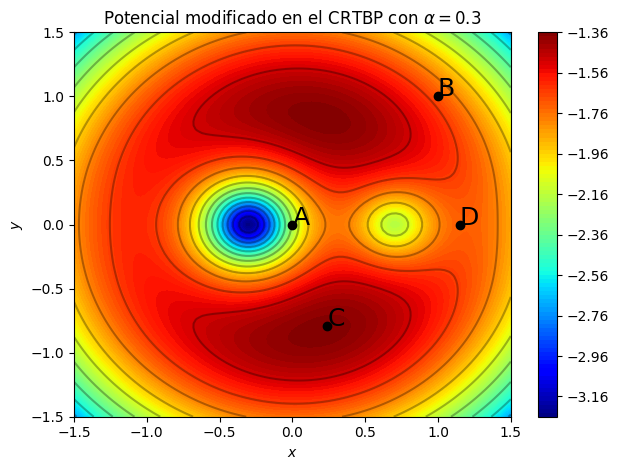

In [6]:
fig=plt.figure()
ax=fig.gca()

#Contornos
ax.contour(X,Y,Vmod,levels=15,colors='k',linestyles='solid',alpha=0.3)
c=ax.contourf(X,Y,Vmod,levels=100,cmap="jet")
fig.colorbar(c)

#Decoración
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.set_title(f"Potencial modificado en el CRTBP con $\\alpha={alfa}$")
fig.tight_layout()

#Puntos de interés
ax.plot([0],[0],'ko')
ax.text(0,0,'A',fontsize=18)
ax.plot([1],[1],'ko')
ax.text(1,1,'B',fontsize=18)
ax.plot([0.8*alfa],[-1+0.7*alfa],'ko')
ax.text(0.8*alfa,-1+0.7*alfa,'C',fontsize=18)
ax.plot([1+0.5*alfa],[0],'ko')
ax.text(1+0.5*alfa,0,'D',fontsize=18);

<hr/>

Para explorar más cuadernos del libro vaya al [repositorio de en GitHub](https://github.com/seap-udea/pymcel/tree/main/ejemplos/cuadernos-libro)